## Comparison between the FFT mode and the non-unifrom FFT mode for the pseudo Wigner distribution 

In [49]:
using Winston;using Color;

In [4]:
include("sampledata.jl")

sampledata

In [8]:
nsample=4096;

In [7]:
xs,ys,iws,ynorms=sampledata.genfm(nsample,2*pi,2*pi/365,1.0,365.0);

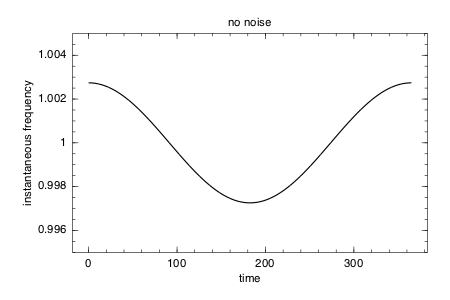

In [11]:
 p = FramedPlot(
title="no noise",
xlabel="time",
ylabel="instantaneous frequency",
yrange=(0.995,1.005)
);
add(p, Curve(xs,iws/(2*pi),width=3))

In [13]:
## sn=1.0; using Distributions; d = Normal()
## ynoise=ys+rand(d,nsample)*std(ys)*sn; ## if you add Gaussian noises, use it.  

In [16]:
ynoise=ys;

In [17]:
import DSP
z=DSP.Util.hilbert(ynoise);

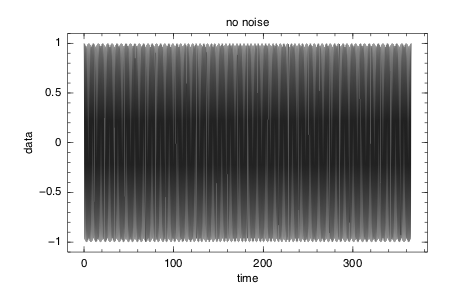

In [19]:
 p = FramedPlot(
title="no noise",
xlabel="time",
ylabel="data",
yrange=(-1.1,1.1)
);
add(p, Curve(xs,real(z),width=1))

In [45]:
include("jnufft.jl");
include("cohenclass.jl");
include("extif.jl");
include("juwutils.jl");

### use FFT

In [21]:
finx=collect(linspace(1,nsample,nsample));
dx=xs[2]-xs[1];freqfac=1/nsample/dx/2

0.0013695285744863013

In [22]:
tfrpf=cohenclass.tfrpwv(z,NaN,NaN,NaN,NaN,NaN,0);

Single pseudo Wigner Ville
Use fft.


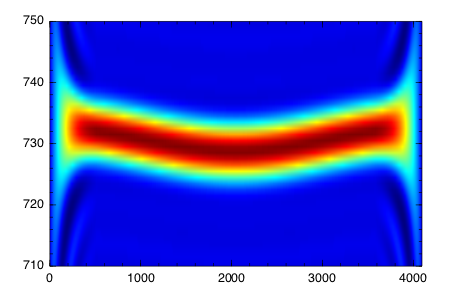

In [24]:
imagesc(real(tfrpf[end:-1:1,:]));ylim(710,750)

In [46]:
indf=extif.maxif(abs(tfrpf));
fx=juwutils.index_to_frequency(indf, finx, dx);

### use non-unifrom FFT

In [27]:
fin=collect(linspace(710,750,nsample));
tfrpfn=cohenclass.tfrpwv(z,NaN,NaN,fin,NaN,NaN,0);

Single pseudo Wigner Ville
Use nufft.


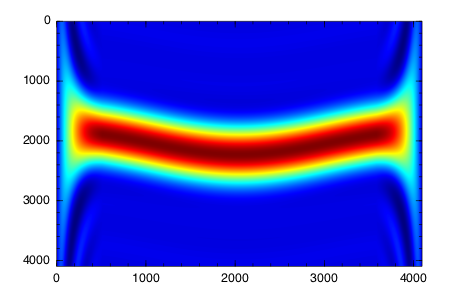

In [28]:
imagesc(real(tfrpfn[end:-1:1,:]))

In [29]:
indfn=extif.maxif(abs(tfrpfn));
fn=juwutils.index_to_frequency(indfn, fin, dx);

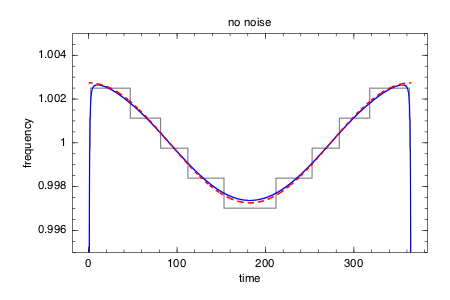

In [48]:
 p = FramedPlot(
title="no noise",
xlabel="time",
ylabel="frequency",
yrange=(0.995,1.005)
);
add(p, Curve(xs,fx, color="gray",width=3))
add(p, Curve(xs,fn, color="blue",width=3))
add(p, Curve(xs,iws/(2*pi), color="red", kind="dash",width=4))